# Bike Rental Prediction - TensorFlow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
data= pd.read_csv("../DATA/bike_sharing_daily.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [4]:
data.drop(columns=["instant", "casual","registered"], axis=1, inplace=True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [5]:
data.dteday= pd.to_datetime(data.dteday, format="%m/%d/%Y")
data.set_index("dteday", drop=True, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


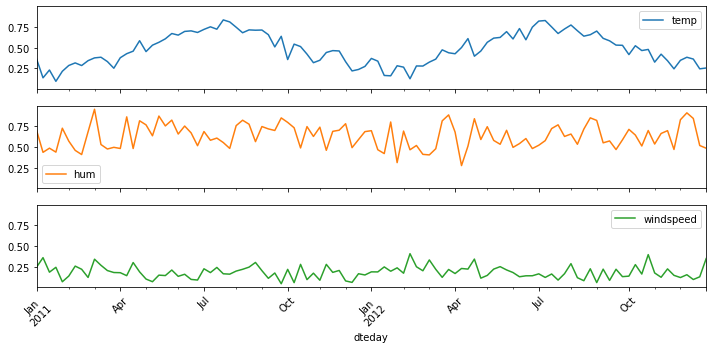

In [6]:
x=data[["temp","hum","windspeed"]].asfreq("W") \
                                  .plot(subplots=True, 
                                        sharey=True,layout=(4,1),
                                        figsize=(12,7),rot=45)

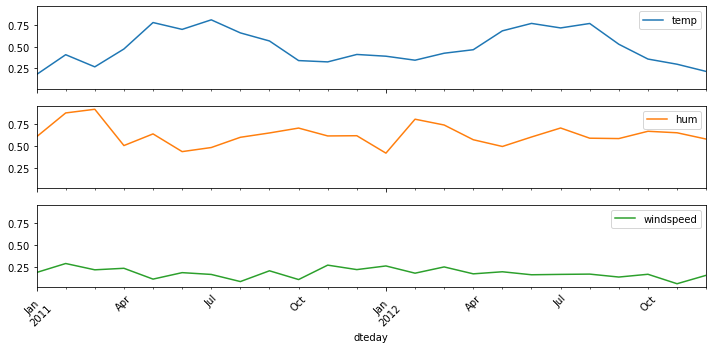

In [7]:
x=data[["temp","hum","windspeed"]].asfreq("M") \
                                  .plot(subplots=True, 
                                        sharey=True,layout=(4,1),
                                        figsize=(12,7),rot=45)

Text(0, 0.5, 'Bike Rental')

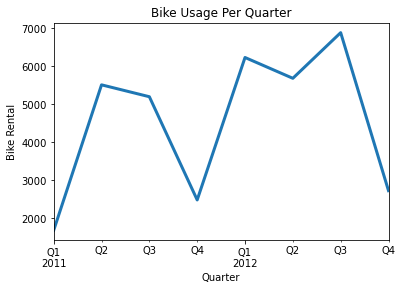

In [8]:
data['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike Usage Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

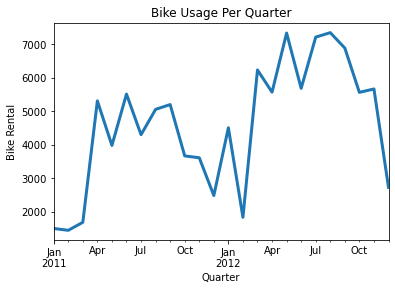

In [9]:
data['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike Usage Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental')

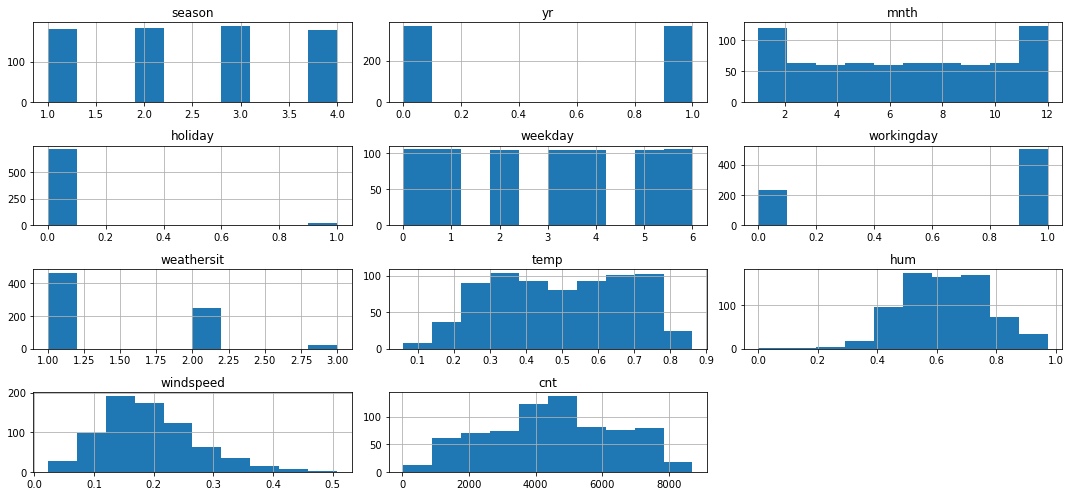

In [10]:
x=data.hist(figsize=(15,7))
plt.tight_layout()

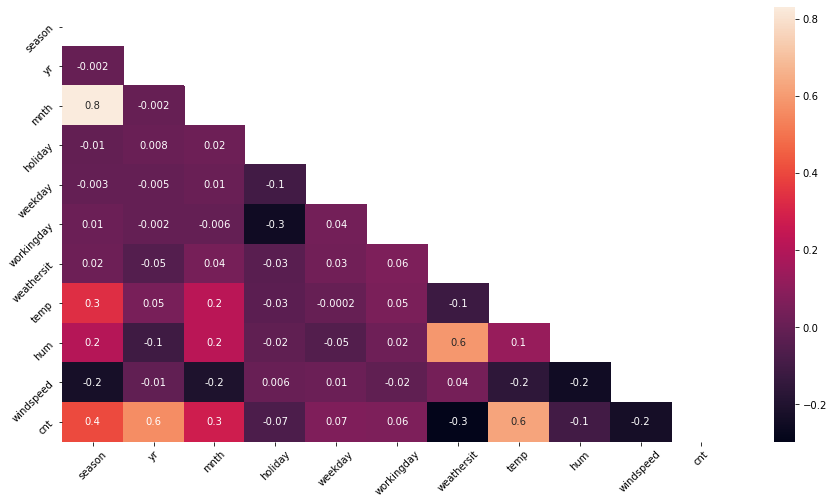

In [11]:
mat= data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(mat, mask=np.triu(mat), annot=True, fmt=".1g",annot_kws={"fontsize":10})
x=plt.xticks(rotation=45)
y= plt.yticks(rotation=45)

In [12]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


In [13]:
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
hum           595
windspeed     650
cnt           696
dtype: int64

In [14]:
cat_vars= data.columns.drop(["temp","hum","windspeed", "cnt"])
cat_vars

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [15]:
data_cat= data[cat_vars]
data_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder= OneHotEncoder(drop="first")
new_cat_data=pd.DataFrame(encoder.fit_transform(data_cat).toarray())
new_cat_data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
num_vars= ["temp","hum","windspeed", "cnt"]
num_data= data[num_vars]
num_data.reset_index(inplace=True)
num_data.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


In [18]:
new_data= pd.concat([num_data, new_cat_data], axis = 1)
new_data.drop(columns=["dteday"], inplace=True)
new_data.head()

,temp,hum,windspeed,cnt,0,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,24
0,0.344167,0.805833,0.160446,985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.363478,0.696087,0.248539,801,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.196364,0.437273,0.248309,1349,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.200000,0.590435,0.160296,1562,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.226957,0.436957,0.186900,1600,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
x= new_data.drop("cnt", axis=1)
y= new_data[["cnt"]]

x.shape, y.shape

((731, 28), (731, 1))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [25]:
y=y.ravel()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [27]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((584, 28), (584,), (147, 28), (147,))

## model - 1

In [29]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(28, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = model.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_split = 0.2)

Epoch 1/20
10/10 [==============================] - 0s 49ms/step - loss: 0.2239 - val_loss: 0.0911
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0834 - val_loss: 0.0935
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.0661 - val_loss: 0.0575
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.0504 - val_loss: 0.0459
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0403 - val_loss: 0.0389
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.0349 - val_loss: 0.0343
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.0316
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0270 - val_loss: 0.0288
Epoch 9/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0246 - val_loss: 0.0264
Epoch 10/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0243
Epoch 11/20
10/10 

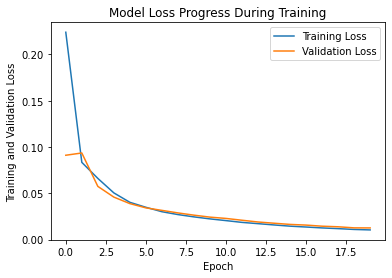

In [30]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [31]:
preds= model.predict(X_test)

model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.0146


0.014566104859113693

In [37]:
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae

mse(y_test,preds), r2_score(y_test, preds), mae(y_test, preds)

(0.014566104780360701, 0.7255575794820801, 0.09571112192282671)

In [38]:
# Adjusted R2
n= len(X_test)
k= X_test.shape[1]

print(n,k)
r2= r2_score(y_test, preds)
print("R2-- ", r2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print("ADJ. R2", adj_r2)

147 28
R2--  0.7255575794820801
ADJ. R2 0.6604356491896923


# Model 2

In [65]:
tf.random.set_seed(42)

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=15, activation='relu', input_shape=(28, )))
model2.add(tf.keras.layers.Dense(units=32, activation='relu'))
model2.add(tf.keras.layers.Dense(units=1, activation='linear'))

model2.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

callback1= keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, min_delta=0.1, mode="min")

epochs_hist2 = model2.fit(X_train, y_train, epochs = 500, batch_size = 50, validation_split = 0.2, callbacks=[callback1])

Epoch 1/500
10/10 [==============================] - 0s 35ms/step - loss: 0.1588 - val_loss: 0.0442
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0524 - val_loss: 0.0303
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0318 - val_loss: 0.0227
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.0178
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.0143
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 8/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.0094
Epoch 9/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 10/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 11

In [69]:
preds= model2.predict(X_test)
model2.evaluate(X_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.0081


0.008086969144642353

In [70]:
mse(y_test,preds), r2_score(y_test, preds), mae(y_test, preds)

(0.008086969174883604, 0.8476320589152111, 0.06579737124807147)

In [72]:
r2= r2_score(y_test, preds)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.8114769542510238

<AxesSubplot:>

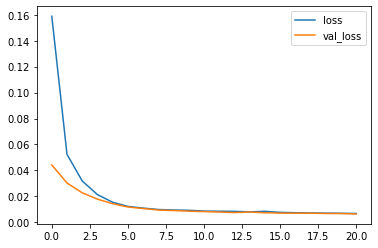

In [68]:
pd.DataFrame(epochs_hist2.history).plot()